# Downstream analysis on spatial multi-omics data of mouse brain with Parkinson's disease

In this tutorial, we will perform downstream analysis of spatial multi-omics data from the mouse brain with Parkinson’s disease, including identification of MCC flow, group-level MCC, MCC remodelling in receiver cells.

In [ ]:
# Importing packages
import os
import metachat as mc
import scanpy as sc

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# Setting your work dictionary
os.chdir("/home/project/metachat_packages/")

## Import MetaChat results 

We manually annotated the MetaChat result using Napari, dividing the left hemisphere as "Intact" and the right hemisphere as "Lesion". For convenience, we will directly import the annotated h5ad.

In [4]:
adata = sc.read('datasets/mouse_brain_parkinson/metachat_result_divided.h5ad')

The original output of MetaChat provides MCC signals for each individual metabolite–sensor pair.
Here, we use `mc.tl.summary_communication` to summarize the overall MCC activity associated with specific metabolites (e.g., dopamine and norepinephrine), aggregating their communication strengths across all corresponding sensors.

In [5]:
sum_metabolites = ['HMDB0000216', 'HMDB0000073']
mc.tl.summary_communication(adata = adata,
                            database_name = 'MetaChatDB',
                            sum_metabolites = sum_metabolites)

## MCC flow

Then, we can compute the vector field of MCC flow using `mc.tl.communication_flow`, which estimates the spatial directionality and magnitude of MCC based on the summarized metabolite signals.

In [6]:
mc.tl.communication_flow(adata = adata,
                         database_name = 'MetaChatDB',
                         sum_metabolites = sum_metabolites,
                         k = 5)

The output vector fields are saved in adata.obsm, e.g., `'MetaChat-vf-MetaChatDB-sender-HMDB0000216'` and `'MetaChat-vf-MetaChatDB-receiver-HMDB0000216'`, corresponding to the sender and receiver flows of each metabolite.

### HMDB0000073: Dopamine

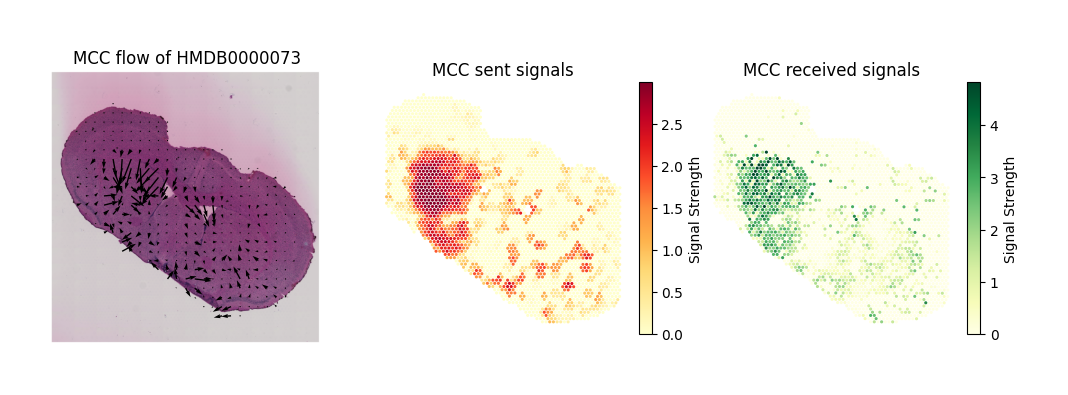

In [7]:
metabolite_name = "HMDB0000073"
fig, ax = plt.subplots(1, 3, figsize=(12,4))
pl1 = mc.pl.plot_communication_flow(adata = adata, 
                                    database_name = 'MetaChatDB',
                                    metabolite_name = metabolite_name,
                                    plot_method = 'grid',
                                    background = 'image',
                                    summary = 'sender',
                                    ndsize = 3,
                                    normalize_v_quantile = 0.995,
                                    grid_density = 0.5,
                                    title = f'MCC flow of {metabolite_name}',   
                                    ax = ax[0])
ax[0].set_box_aspect(1)

pl2 = mc.pl.plot_communication_flow(adata = adata, 
                                    database_name = 'MetaChatDB',
                                    metabolite_name = metabolite_name,
                                    plot_method = None,
                                    background = 'summary',
                                    summary = 'sender',
                                    cmap = 'YlOrRd',
                                    ndsize = 5,
                                    normalize_v_quantile = 0.995,
                                    title = 'MCC sent signals',   
                                    ax = ax[1])
ax[1].set_box_aspect(1)

pl3 = mc.pl.plot_communication_flow(adata = adata, 
                                    database_name = 'MetaChatDB',
                                    metabolite_name = metabolite_name,
                                    plot_method = None,
                                    background = 'summary',
                                    summary = 'receiver',
                                    cmap = 'YlGn',
                                    ndsize = 5,
                                    normalize_v_quantile = 0.995,
                                    title = 'MCC received signals',   
                                    ax = ax[2])
ax[2].set_box_aspect(1)

We can visualize which metabolite–sensor pairs contribute most to the overall MCC signals of a specific metabolite across tissue types using `mc.pl.plot_MSpair_contribute_group`.

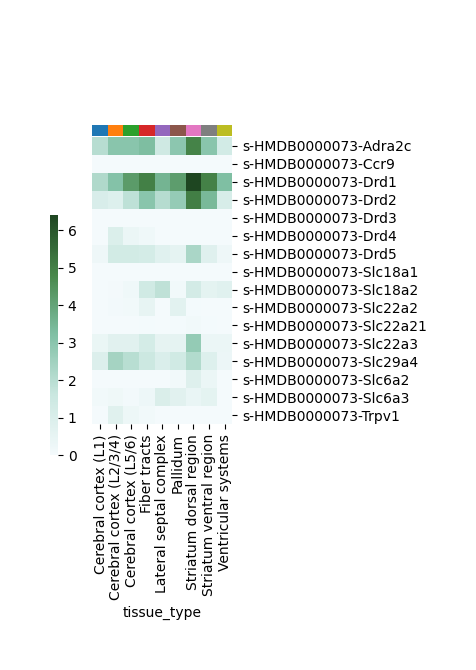

In [8]:
mc.pl.plot_MSpair_contribute_group(adata = adata, 
                                   database_name = 'MetaChatDB',
                                   group_name = 'tissue_type',
                                   metabolite_name = metabolite_name,
                                   summary = 'sender',
                                   cmap = 'green',
                                   figsize = (4,6))

### HMDB0000216: Norepinephrine

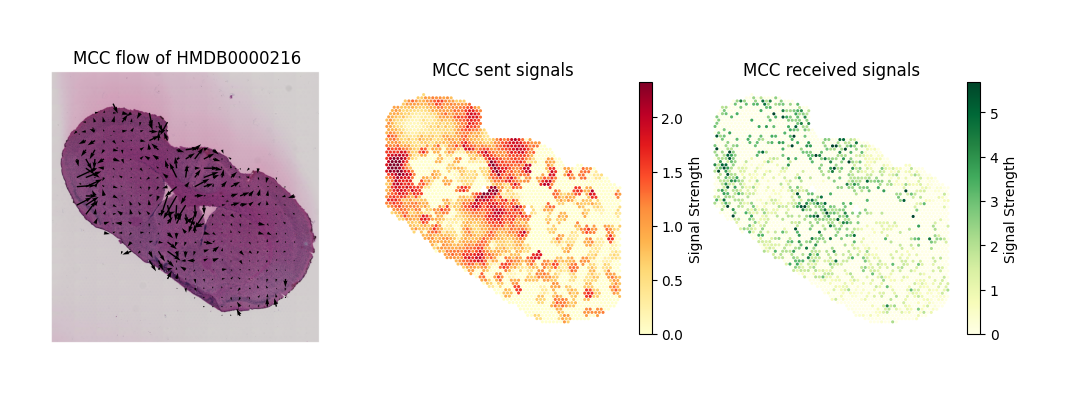

In [9]:
metabolite_name = "HMDB0000216"
fig, ax = plt.subplots(1, 3, figsize=(12,4))
pl1 = mc.pl.plot_communication_flow(adata = adata, 
                                    database_name = 'MetaChatDB',
                                    metabolite_name = metabolite_name,
                                    plot_method = 'grid',
                                    background = 'image',
                                    summary = 'sender',
                                    ndsize = 3,
                                    normalize_v_quantile = 0.995,
                                    grid_density = 0.5,
                                    title = f'MCC flow of {metabolite_name}',   
                                    ax = ax[0])
ax[0].set_box_aspect(1)

pl2 = mc.pl.plot_communication_flow(adata = adata, 
                                    database_name = 'MetaChatDB',
                                    metabolite_name = metabolite_name,
                                    plot_method = None,
                                    background = 'summary',
                                    summary = 'sender',
                                    cmap = 'YlOrRd',
                                    ndsize = 5,
                                    normalize_v_quantile = 0.995,
                                    title = 'MCC sent signals',   
                                    ax = ax[1])
ax[1].set_box_aspect(1)

pl3 = mc.pl.plot_communication_flow(adata = adata, 
                                    database_name = 'MetaChatDB',
                                    metabolite_name = metabolite_name,
                                    plot_method = None,
                                    background = 'summary',
                                    summary = 'receiver',
                                    cmap = 'YlGn',
                                    ndsize = 5,
                                    normalize_v_quantile = 0.995,
                                    title = 'MCC received signals',   
                                    ax = ax[2])
ax[2].set_box_aspect(1)

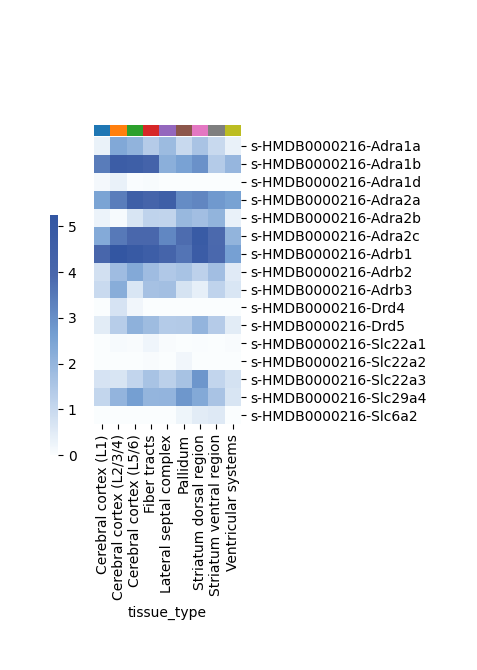

In [10]:
mc.pl.plot_MSpair_contribute_group(adata = adata, 
                                   database_name = 'MetaChatDB',
                                   group_name = 'tissue_type',
                                   metabolite_name = metabolite_name,
                                   summary = 'sender',
                                   cmap = 'blue',
                                   figsize = (4,6))

## MCC remodelling in receiver cells

In the next step, we aim to identify response genes in receiver cells. To do this, we provide the corresponding raw RNA data (`adata_raw`) as reference, which allows MetaChat to estimate transcriptional changes associated with signaling activity.

In [16]:
adata_raw = sc.read('datasets/mouse_brain_parkinson/adata_RNA_raw.h5ad')

### HMDB0000073: Dopamine

The function `mc.tl.communication_responseGenes` supports identifying response genes within a defined spatial subset of the tissue, allowing users to focus on specific regions or cell groups where the received signal is most relevant.

In [17]:
metabolite_name = 'HMDB0000073'
df_deg, df_yhat = mc.tl.communication_responseGenes(adata = adata,
                                                    adata_raw = adata_raw,
                                                    database_name = 'MetaChatDB',
                                                    metabolite_name = metabolite_name,
                                                    subgroup = ['Striatum dorsal region', 'Striatum ventral region'],
                                                    group_name = 'tissue_type',
                                                    summary = 'receiver')

100%|██████████| 100/100 [00:13<00:00,  7.31/s]


  |                                                  | 0 % ~calculating   |+                                                 | 1 % ~03m 08s       |+                                                 | 2 % ~03m 04s       |++                                                | 3 % ~02m 60s       |++                                                | 4 % ~02m 60s       |+++                                               | 5 % ~02m 59s       |+++                                               | 6 % ~03m 26s       |++++                                              | 7 % ~03m 28s       |++++                                              | 8 % ~03m 46s       |+++++                                             | 9 % ~03m 46s       |+++++                                             | 10% ~03m 39s       |++++++                                            | 11% ~03m 32s       |++++++                                            | 12% ~03m 27s       |+++++++                                           | 13% ~03m 

Next, we clustered the response genes based on their expression trends along the received signaling strength. This allows us to identify distinct transcriptional programs that are activated or suppressed in response to MCC signal.

In [18]:
df_deg_clus, df_yhat_clus = mc.tl.communication_responseGenes_cluster(df_deg.iloc[:,:3], df_yhat, deg_clustering_res=0.3)

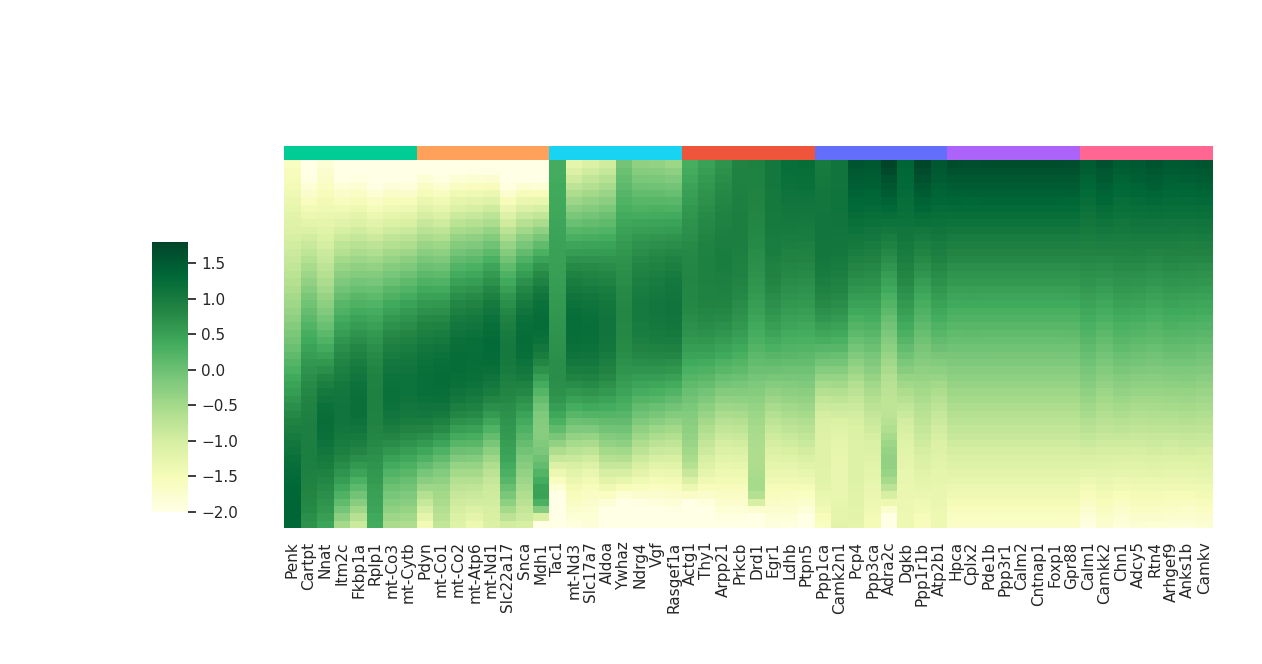

In [19]:
mc.pl.plot_communication_responseGenes(
    df_deg = df_deg_clus,
    df_yhat = df_yhat_clus,
    top_ngene_per_cluster = 8,
    colormap = 'YlGn',
    color_range = (-2,2),
    font_scale = 1,
    figsize = (12,6),
    return_genes = False
)

In [24]:
kegg_result = mc.tl.communication_responseGenes_keggEnrich(
    gene_list = df_deg[df_deg['pvalue'] < 0.05].index.tolist()[:1000],
    gene_sets = "KEGG_2019_Mouse",
    organism = "Mouse")

<Axes: xlabel='-log10(p-value)', ylabel='KEGG pathway'>

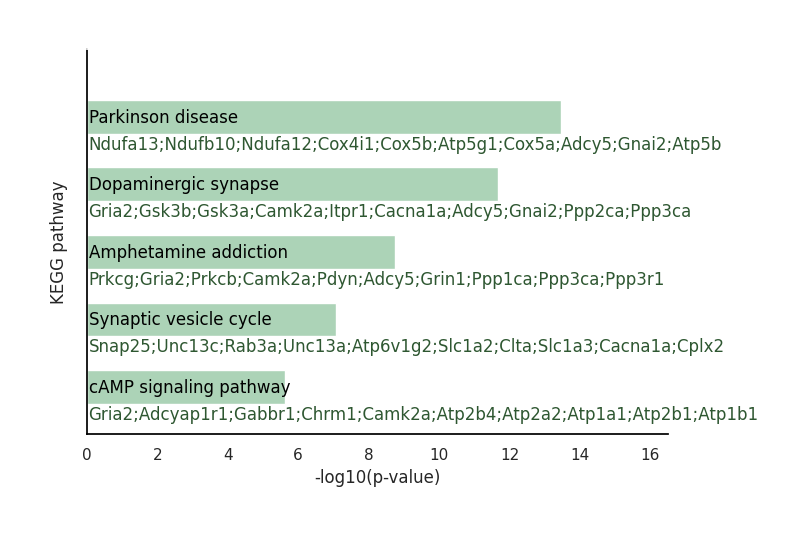

In [26]:
mc.pl.plot_communication_responseGenes_keggEnrich(
    df_result = kegg_result,
    show_term_order = [2,5,11,17,25],
    cmap = 'green',
    maxshow_gene = 10,
    organism = "Mouse",
    figsize = (7.5,5))

### HMDB0000216: Norepinephrine

In [27]:
adata_raw = sc.read('datasets/mouse_brain_parkinson/adata_RNA_raw.h5ad')

In [28]:
metabolite_name = 'HMDB0000216'
df_deg, df_yhat = mc.tl.communication_responseGenes(
    adata = adata,
    adata_raw = adata_raw,
    database_name = 'MetaChatDB',
    metabolite_name = metabolite_name,
    subgroup = ['Cerebral cortex (L1)', 'Cerebral cortex (L2/3/4)', 'Cerebral cortex (L5/6)'],
    group_name = 'tissue_type',
    summary = 'receiver'
)

100%|██████████| 100/100 [00:12<00:00,  7.85/s]


  |                                                  | 0 % ~calculating   |+                                                 | 1 % ~03m 49s       |+                                                 | 2 % ~03m 37s       |++                                                | 3 % ~03m 55s       |++                                                | 4 % ~03m 55s       |+++                                               | 5 % ~04m 04s       |+++                                               | 6 % ~04m 26s       |++++                                              | 7 % ~04m 54s       |++++                                              | 8 % ~04m 45s       |+++++                                             | 9 % ~04m 43s       |+++++                                             | 10% ~04m 32s       |++++++                                            | 11% ~04m 28s       |++++++                                            | 12% ~04m 29s       |+++++++                                           | 13% ~05m 

In [29]:
df_deg_clus, df_yhat_clus = mc.tl.communication_responseGenes_cluster(df_deg.iloc[:,:3], df_yhat, deg_clustering_res=0.3)

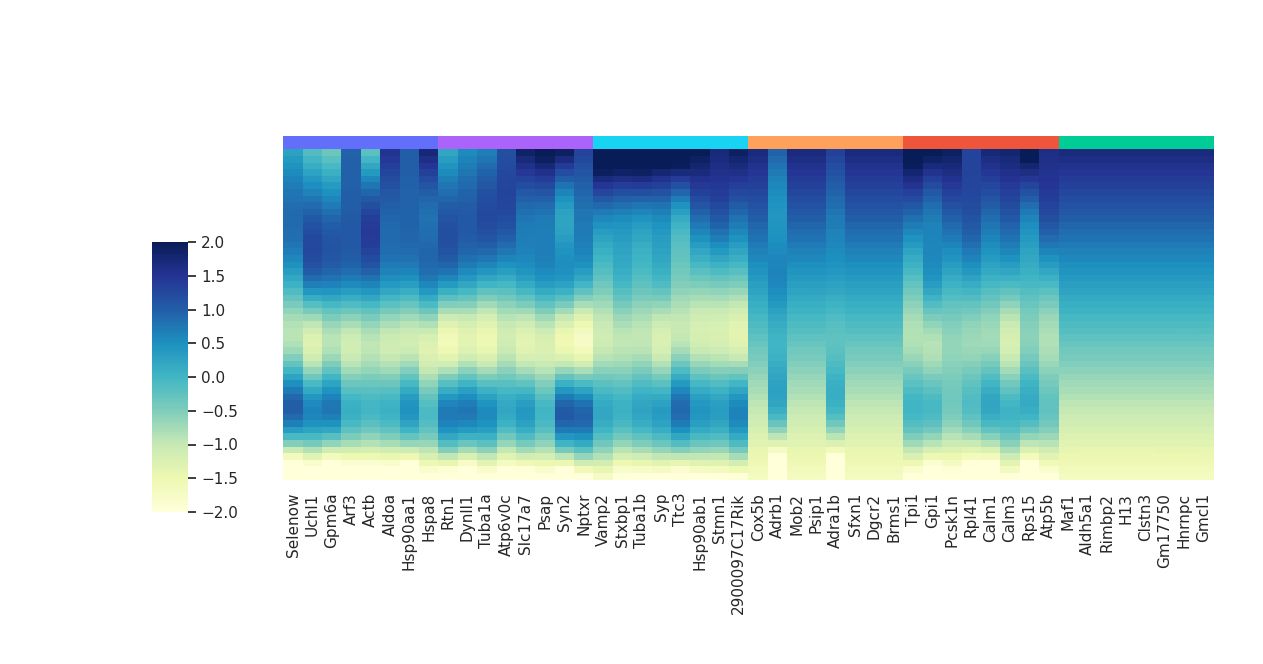

In [30]:
mc.pl.plot_communication_responseGenes(
    df_deg = df_deg_clus,
    df_yhat = df_yhat_clus,
    top_ngene_per_cluster = 8,
    colormap = 'YlGnBu',
    color_range = (-2,2),
    font_scale = 1,
    figsize = (12,6),
    return_genes = False
)

In [ ]:
kegg_result_subgroup = mc.tl.communication_responseGenes_keggEnrich(
    gene_list = df_deg[df_deg['pvalue'] < 0.05].index.tolist()[:1000],
    gene_sets = "KEGG_2019_Mouse",
    organism = "Mouse"
)

<Axes: xlabel='-log10(p-value)', ylabel='KEGG pathway'>

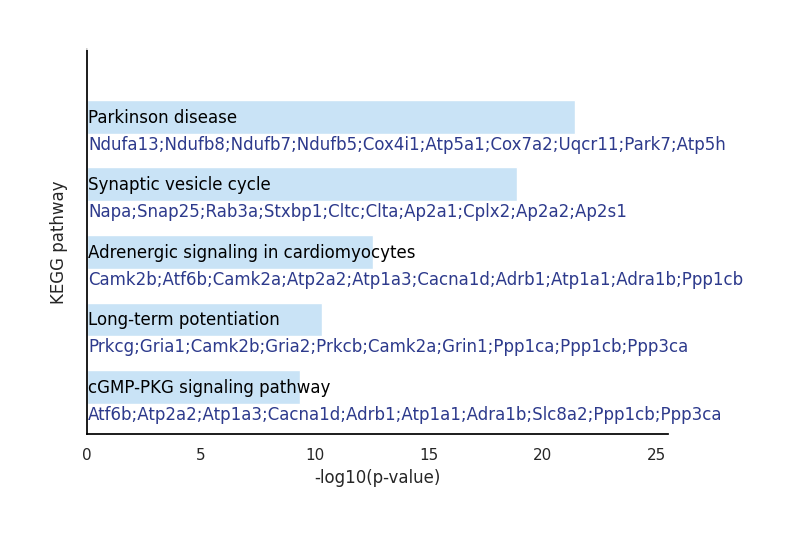

In [36]:
mc.pl.plot_communication_responseGenes_keggEnrich(
    df_result = kegg_result_subgroup,
    show_term_order = [3,5,7,10,14],
    cmap = 'blue',
    maxshow_gene = 10,
    organism = "Mouse",
    figsize = (7.5,5)
)